In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read vehicle data using pandas
dfv = pd.read_csv('dft-road-casualty-statistics-vehicle-2010-2021.csv')
dfv.head(10)

C:\Users\Haywh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,3,25,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,12641520,201001BS70003,2010,01BS70003,1,19,0,9,2,8,...,2,44,7,1360,1,1,-1,-1,1,E01004040
1,12641521,201001BS70003,2010,01BS70003,2,1,0,7,6,8,...,1,26,6,-1,-1,-1,-1,-1,1,E01002911
2,12641522,201001BS70004,2010,01BS70004,1,9,0,18,2,6,...,1,48,8,1870,2,3,-1,-1,1,E01002692
3,12641523,201001BS70006,2010,01BS70006,1,20,0,7,6,8,...,1,42,7,3920,2,8,-1,-1,1,E01000050
4,12641524,201001BS70006,2010,01BS70006,2,1,0,15,6,2,...,1,33,6,-1,-1,-1,-1,-1,1,E01001374
5,12641525,201001BS70007,2010,01BS70007,1,9,0,17,4,1,...,2,24,5,1998,1,7,-1,-1,1,E01002829
6,12641526,201001BS70007,2010,01BS70007,2,9,0,18,6,2,...,2,36,7,1397,1,11,-1,-1,3,E01022202
7,12641527,201001BS70008,2010,01BS70008,1,8,0,9,6,4,...,1,55,8,1995,2,8,-1,-1,1,E01001191
8,12641528,201001BS70008,2010,01BS70008,2,5,0,18,2,6,...,1,27,6,749,1,4,-1,-1,1,E01017203
9,12641529,201001BS70009,2010,01BS70009,1,9,0,18,3,7,...,1,28,6,1781,1,11,-1,-1,-1,-1


## Data Wrangling

Check for properties

In [3]:
dfv.shape

(2890752, 29)

In [4]:
dfv.describe()

,Unnamed: 0,accident_year,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,...,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
count,2.890752e+06,2.890752e+06,2.890752e+06,2.890752e+06,2.890752e+06,2.890752e+06,2.890752e+06,2.890752e+06,2.890752e+06,2.890752e+06,...,2.890752e+06,2.890752e+06,2.890752e+06,2.890752e+06,2.890752e+06,2.890752e+06,2.890752e+06,2.890752e+06,2.890752e+06,2.890752e+06
mean,1.408690e+07,2.015051e+03,1.555090e+00,9.719228e+00,9.125549e-02,1.429193e+01,4.241941e+00,4.230748e+00,1.971099e+00,2.623784e+00,...,1.133416e+00,5.341372e+00,1.431421e+00,3.523801e+01,5.929176e+00,1.406875e+03,8.847452e-01,5.488575e+00,1.161717e+00,8.818688e-01
std,8.344884e+05,3.364526e+00,1.137195e+00,9.566937e+00,8.050621e-01,1.326644e+01,2.509817e+00,2.514469e+00,1.330820e+01,3.230532e+00,...,1.015217e+00,3.311988e+00,6.320003e-01,2.020109e+01,3.034290e+00,1.636860e+03,1.354366e+00,5.824942e+00,3.364437e+00,1.094905e+00
min,1.264152e+07,2.010000e+03,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,1.336421e+07,2.012000e+03,1.000000e+00,9.000000e+00,0.000000e+00,7.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,2.000000e+00,1.000000e+00,2.300000e+01,5.000000e+00,-1.000000e+00,1.000000e+00,0.000000e+00,-1.000000e+00,1.000000e+00
50%,1.408690e+07,2.015000e+03,1.000000e+00,9.000000e+00,0.000000e+00,1.700000e+01,4.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00,...,1.000000e+00,6.000000e+00,1.000000e+00,3.500000e+01,6.000000e+00,1.390000e+03,1.000000e+00,5.000000e+00,-1.000000e+00,1.000000e+00
75%,1.480958e+07,2.018000e+03,2.000000e+00,9.000000e+00,0.000000e+00,1.800000e+01,6.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,...,1.000000e+00,6.000000e+00,2.000000e+00,4.900000e+01,8.000000e+00,1.896000e+03,2.000000e+00,1.000000e+01,3.000000e+00,1.000000e+00
max,1.553227e+07,2.021000e+03,9.990000e+02,9.900000e+01,9.000000e+00,9.900000e+01,9.000000e+00,9.000000e+00,9.900000e+01,9.000000e+00,...,9.000000e+00,1.500000e+01,3.000000e+00,1.020000e+02,1.100000e+01,9.999900e+04,1.200000e+01,1.110000e+02,1.000000e+01,3.000000e+00


In [5]:
dfv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890752 entries, 0 to 2890751
Data columns (total 29 columns):
 #   Column                            Dtype 
---  ------                            ----- 
 0   Unnamed: 0                        int64 
 1   accident_index                    object
 2   accident_year                     int64 
 3   accident_reference                object
 4   vehicle_reference                 int64 
 5   vehicle_type                      int64 
 6   towing_and_articulation           int64 
 7   vehicle_manoeuvre                 int64 
 8   vehicle_direction_from            int64 
 9   vehicle_direction_to              int64 
 10  vehicle_location_restricted_lane  int64 
 11  junction_location                 int64 
 12  skidding_and_overturning          int64 
 13  hit_object_in_carriageway         int64 
 14  vehicle_leaving_carriageway       int64 
 15  hit_object_off_carriageway        int64 
 16  first_point_of_impact             int64 
 17  vehicle_

In [6]:
dfv.dtypes

Unnamed: 0                           int64
accident_index                      object
accident_year                        int64
accident_reference                  object
vehicle_reference                    int64
vehicle_type                         int64
towing_and_articulation              int64
vehicle_manoeuvre                    int64
vehicle_direction_from               int64
vehicle_direction_to                 int64
vehicle_location_restricted_lane     int64
junction_location                    int64
skidding_and_overturning             int64
hit_object_in_carriageway            int64
vehicle_leaving_carriageway          int64
hit_object_off_carriageway           int64
first_point_of_impact                int64
vehicle_left_hand_drive              int64
journey_purpose_of_driver            int64
sex_of_driver                        int64
age_of_driver                        int64
age_band_of_driver                   int64
engine_capacity_cc                   int64
propulsion_

In [7]:
dfv.duplicated().sum()

0

In [8]:
dfv.isna().sum()

Unnamed: 0                          0
accident_index                      0
accident_year                       0
accident_reference                  0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_d

### Brief summary of above analysis

- There are 2890752 rows and 29 columns
- There are no null and duplicate values

- Columns will be analysed and columns that won't be used will be dropped

## Cleaning


Extract cars data

In [9]:
#count the values of vehicles involved
dfv.vehicle_type.value_counts()

 9     2050265
 1      226300
 19     151978
 3       96476
 5       76584
 11      61751
 8       57229
 21      50778
 4       26580
 2       26100
 90      20649
 20      17545
 98       7464
 17       6167
 10       6118
 97       3031
 22       2165
-1        1375
 16       1281
 23        568
 18        244
 99        104
Name: vehicle_type, dtype: int64

In [10]:
#get the top 10 vehicles that were in accidents frequently
top10 = dfv.vehicle_type.value_counts().head(10)
top10

9     2050265
1      226300
19     151978
3       96476
5       76584
11      61751
8       57229
21      50778
4       26580
2       26100
Name: vehicle_type, dtype: int64

Interpretation of the Vehicle type values

9 - Car

1 - Pedal cycle

19 - Van / Goods 3.5 tonnes mgw or under

3 - Motorcycle 125cc and under

5 - Motorcycle over 500cc 

11 - Bus or coach (17 or more pass seats)

8 - Taxi/Private hire car

21 - Goods 7.5 tonnes mgw and over

4 - Motorcycle over 125cc and up to 500cc

2 - Motorcycle 50cc and under


For majority of car accidents cars are mostly involved, with a count of 2050265 accidents in the time frame of 12 years.

Pedal cycles and van/goods are in the top 3, they both have accident counts of 226300 and 151978 respectively

#### Which vehicle had towing and articulation?

In [11]:
# separate the vehicle type column into buses and cars

cars = dfv[(dfv['vehicle_type'] == 8) | (dfv['vehicle_type'] == 9)]
cars

,Unnamed: 0,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
2,12641522,201001BS70004,2010,01BS70004,1,9,0,18,2,6,...,1,48,8,1870,2,3,-1,-1,1,E01002692
5,12641525,201001BS70007,2010,01BS70007,1,9,0,17,4,1,...,2,24,5,1998,1,7,-1,-1,1,E01002829
6,12641526,201001BS70007,2010,01BS70007,2,9,0,18,6,2,...,2,36,7,1397,1,11,-1,-1,3,E01022202
7,12641527,201001BS70008,2010,01BS70008,1,8,0,9,6,4,...,1,55,8,1995,2,8,-1,-1,1,E01001191
9,12641529,201001BS70009,2010,01BS70009,1,9,0,18,3,7,...,1,28,6,1781,1,11,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890746,15532266,2021991196607,2021,991196607,1,9,0,18,5,1,...,1,38,7,-1,-1,-1,-1,5,2,-1
2890747,15532267,2021991196607,2021,991196607,2,9,0,18,1,5,...,1,61,9,-1,-1,-1,-1,9,2,-1
2890748,15532268,2021991197944,2021,991197944,1,9,0,18,3,7,...,2,51,8,-1,-1,-1,-1,5,3,-1
2890749,15532269,2021991200639,2021,991200639,1,9,0,18,4,8,...,2,24,5,-1,-1,-1,-1,4,1,-1


In [12]:
cars.vehicle_type.unique()

array([9, 8], dtype=int64)

In [13]:
buses = dfv[(dfv['vehicle_type'] == 10) | (dfv['vehicle_type'] == 11) | (dfv['vehicle_type'] == 19)]
buses

,Unnamed: 0,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,12641520,201001BS70003,2010,01BS70003,1,19,0,9,2,8,...,2,44,7,1360,1,1,-1,-1,1,E01004040
15,12641535,201001BS70012,2010,01BS70012,1,19,0,9,2,8,...,1,31,6,1753,2,11,-1,-1,1,E01002873
17,12641537,201001BS70013,2010,01BS70013,1,11,0,7,2,4,...,1,36,7,9000,2,2,-1,-1,1,E01003876
38,12641558,201001BS70028,2010,01BS70028,1,11,0,4,6,2,...,1,-1,-1,7300,2,5,-1,-1,-1,-1
40,12641560,201001BS70029,2010,01BS70029,1,10,0,3,3,7,...,1,58,9,-1,-1,-1,-1,-1,1,E01016490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890651,15532171,2021991147999,2021,991147999,1,19,0,18,5,1,...,1,26,6,2143,2,2,MERCEDES SPRINTER,5,1,E01026971
2890681,15532201,2021991160850,2021,991160850,1,19,0,5,7,3,...,1,35,6,2143,2,9,MERCEDES SPRINTER,4,1,-1
2890699,15532219,2021991168029,2021,991168029,1,11,0,2,0,0,...,1,30,6,9000,2,7,SCANIA MODEL MISSING,5,2,-1
2890722,15532242,2021991179757,2021,991179757,2,11,0,5,5,1,...,1,45,7,-1,-1,-1,-1,10,2,-1


#### What are the different types of cars and what models were involved in the accidents?


In [14]:
cars.vehicle_type.unique()

array([9, 8], dtype=int64)

9 - cars
8 - Taxi/Private hire car

In [15]:
#unique values of generic make model
cars.generic_make_model.unique()

array([-1, '-1', 'AUDI Q5', 'AUDI A1', 'TOYOTA PRIUS', 'BMW 4 SERIES',
       'VOLVO V60', 'MERCEDES C CLASS', 'JAGUAR XF SERIES', 'BMW X5',
       'BMW 1 SERIES', 'PORSCHE CAYENNE', 'AUDI A4', 'VOLKSWAGEN CADDY',
       'HONDA CRV', 'VAUXHALL CORSA', 'VOLKSWAGEN POLO',
       'VOLKSWAGEN GOLF', 'BMW 5 SERIES', 'FIAT 500', 'MAZDA 323',
       'HONDA INSIGHT', 'TOYOTA AYGO', 'TOYOTA YARIS', 'JAGUAR X TYPE',
       'NISSAN NOTE', 'FORD KA', 'TOYOTA COROLLA', 'TOYOTA Model Missing',
       'MITSUBISHI OUTLANDER', 'FORD FOCUS', 'MERCEDES A CLASS',
       'SMART FORTWO', 'AUDI A6', 'VAUXHALL MOKKA',
       'LAND ROVER RANGE ROVER', 'BMW 6 SERIES', 'FORD FIESTA',
       'PEUGEOT 108', 'CITROEN C4', 'BMW M3', 'AUDI A3',
       'MERCEDES B CLASS', 'FORD KUGA', 'PEUGEOT 107', 'RENAULT CLIO',
       'TOYOTA PREVIA', 'SUZUKI WAGON R+', 'MAZDA 3', 'VOLKSWAGEN TIGUAN',
       'KIA SORENTO', 'MERCEDES GLA CLASS', 'TOYOTA MODEL MISSING',
       'KIA NIRO', 'SEAT ALHAMBRA', 'BMW 3 SERIES', 'MINI ROADS

In [16]:
#types of cars involved in accidents
cars.vehicle_type.value_counts()

9    2050265
8      57229
Name: vehicle_type, dtype: int64

In [17]:
# what models were mostly involved in the accidents
cars9 = cars[cars['vehicle_type'] == 9]


In [18]:
cars9.groupby('vehicle_type')['generic_make_model'].value_counts().head(20)

vehicle_type  generic_make_model
9             -1                    1799674
              -1                      59905
              FORD FIESTA              9531
              VAUXHALL CORSA           7808
              VOLKSWAGEN GOLF          7212
              FORD FOCUS               7208
              VAUXHALL ASTRA           6944
              BMW 3 SERIES             4932
              VOLKSWAGEN POLO          4502
              BMW 1 SERIES             3388
              AUDI A3                  3328
              TOYOTA YARIS             3266
              MERCEDES C CLASS         3214
              NISSAN QASHQAI           2851
              RENAULT CLIO             2737
              MERCEDES A CLASS         2412
              HONDA CIVIC              2276
              BMW 5 SERIES             2168
              VAUXHALL ZAFIRA          2145
              MINI COOPER              2132
Name: generic_make_model, dtype: int64

In [19]:
cars9.groupby('vehicle_type')['generic_make_model'].value_counts().tail()

vehicle_type  generic_make_model   
9             PEUGEOT 807              10
              SSANGYONG REXTON         10
              PEUGEOT Model Missing     9
              VOLVO Model Missing       8
              Honda Model Missing       6
Name: generic_make_model, dtype: int64

In [20]:
cars8 = cars[cars['vehicle_type'] == 8]

In [21]:
cars8.groupby('vehicle_type')['generic_make_model'].value_counts().head(20)

vehicle_type  generic_make_model   
8             -1                       51522
              -1                        1962
              TOYOTA PRIUS               906
              LONDON TAXIS INT. TX4      270
              TOYOTA AURIS               239
              SKODA OCTAVIA              217
              MERCEDES VITO              183
              MERCEDES E CLASS           162
              LEVC TX                    161
              VOLKSWAGEN PASSAT          123
              VOLKSWAGEN SHARAN          120
              TOYOTA AVENSIS             119
              VAUXHALL ZAFIRA             85
              FORD MONDEO                 84
              FORD GALAXY                 82
              SKODA SUPERB                65
              TOYOTA PRIUS+               59
              MITSUBISHI OUTLANDER        52
              NISSAN LEAF                 52
              VAUXHALL INSIGNIA           50
Name: generic_make_model, dtype: int64

In [22]:
cars8.groupby('vehicle_type')['generic_make_model'].value_counts().tail()

vehicle_type  generic_make_model  
8             TOYOTA Model Missing    15
              BMW 3 SERIES            14
              BMW 5 SERIES            14
              PEUGEOT PREMIER         11
              HYUNDAI I40             10
Name: generic_make_model, dtype: int64

For this dataset, the car types are Cars and taxi/private hire cars

Cars  were mostly involved in accidents with a count of 2050265 accidents within the 12 years time frame. Taxi/private hire cars had a total accident count of 57229.

For Cars, 

- 1859579 generic make models were not recorded
- FORD FIESTA tops the chart for the car brand that was mostly involved in accidents, it had a count of 9531 total accidents
- VAUXHALL CORSA, VOLKSWAGEN GOLF, and FORD FOCUS all got into accidents over 7000 times.
- PEUGEOT 807, SSANGYONG REXTON, PEUGEOT (Model Missing), VOLVO (Model Missing) and Honda (Model Missing) all had the lowest accident counts of 10 accidents and less.


For Taxi/Private hire cars,

- 53484 generic make models were not recorded
- TOYOTA PRIUS tops the chart for the car brand that was mostly involved in accidents, it had a count of 906 total accidents
- LONDON TAXIS INT. TX4, TOYOTA AURIS, and SKODA OCTAVIA all had accident counts of 270, 239 and 217.
- The cars that had the least amount of accidents are TOYOTA (Model Missing), BMW 3 SERIES, BMW 5 SERIES, PEUGEOT PREMIER and HYUNDAI I40 which had count of 15 and less.

#### Which car type had towing and articulation?

In [23]:
#view the unique values of towing and articulation
cars.towing_and_articulation.unique()

array([ 0,  3,  4,  5,  2, -1,  9,  1], dtype=int64)

Interpretation of values

0 - No tow/articulation

1 - Articulated vehicle

2 - Double or multiple trailer

3 - Caravan

4 - Single trailer

5 - Other tow

9 - unknown (self reported)

-1 - Data missing or out of range


In [24]:
cars.towing_and_articulation.value_counts()

 0    2090239
 9       8404
 4       3581
-1       2337
 3       1426
 5       1310
 2        153
 1         44
Name: towing_and_articulation, dtype: int64

Majority of the cars involved in accidents did not have any tow or articulation or have an unknown status

#### What action were cars taking at the point of accident?

In [25]:
#view the unique values
cars.vehicle_manoeuvre.unique()

array([18, 17,  9,  4,  6,  5,  7,  2, 12, 10, 16, 14,  8,  3,  1, 15, 13,
       11, -1, 99], dtype=int64)

In [26]:
cars.vehicle_manoeuvre.value_counts()

 18    926043
 9     230482
 4     166430
 3     144284
 2      95888
 5      95386
 17     77759
 7      75249
 16     67486
 10     36225
 99     34835
 1      32348
 13     31153
 6      19042
 12     17764
 14     16848
 11     16703
 8      12346
 15      8563
-1       2660
Name: vehicle_manoeuvre, dtype: int64

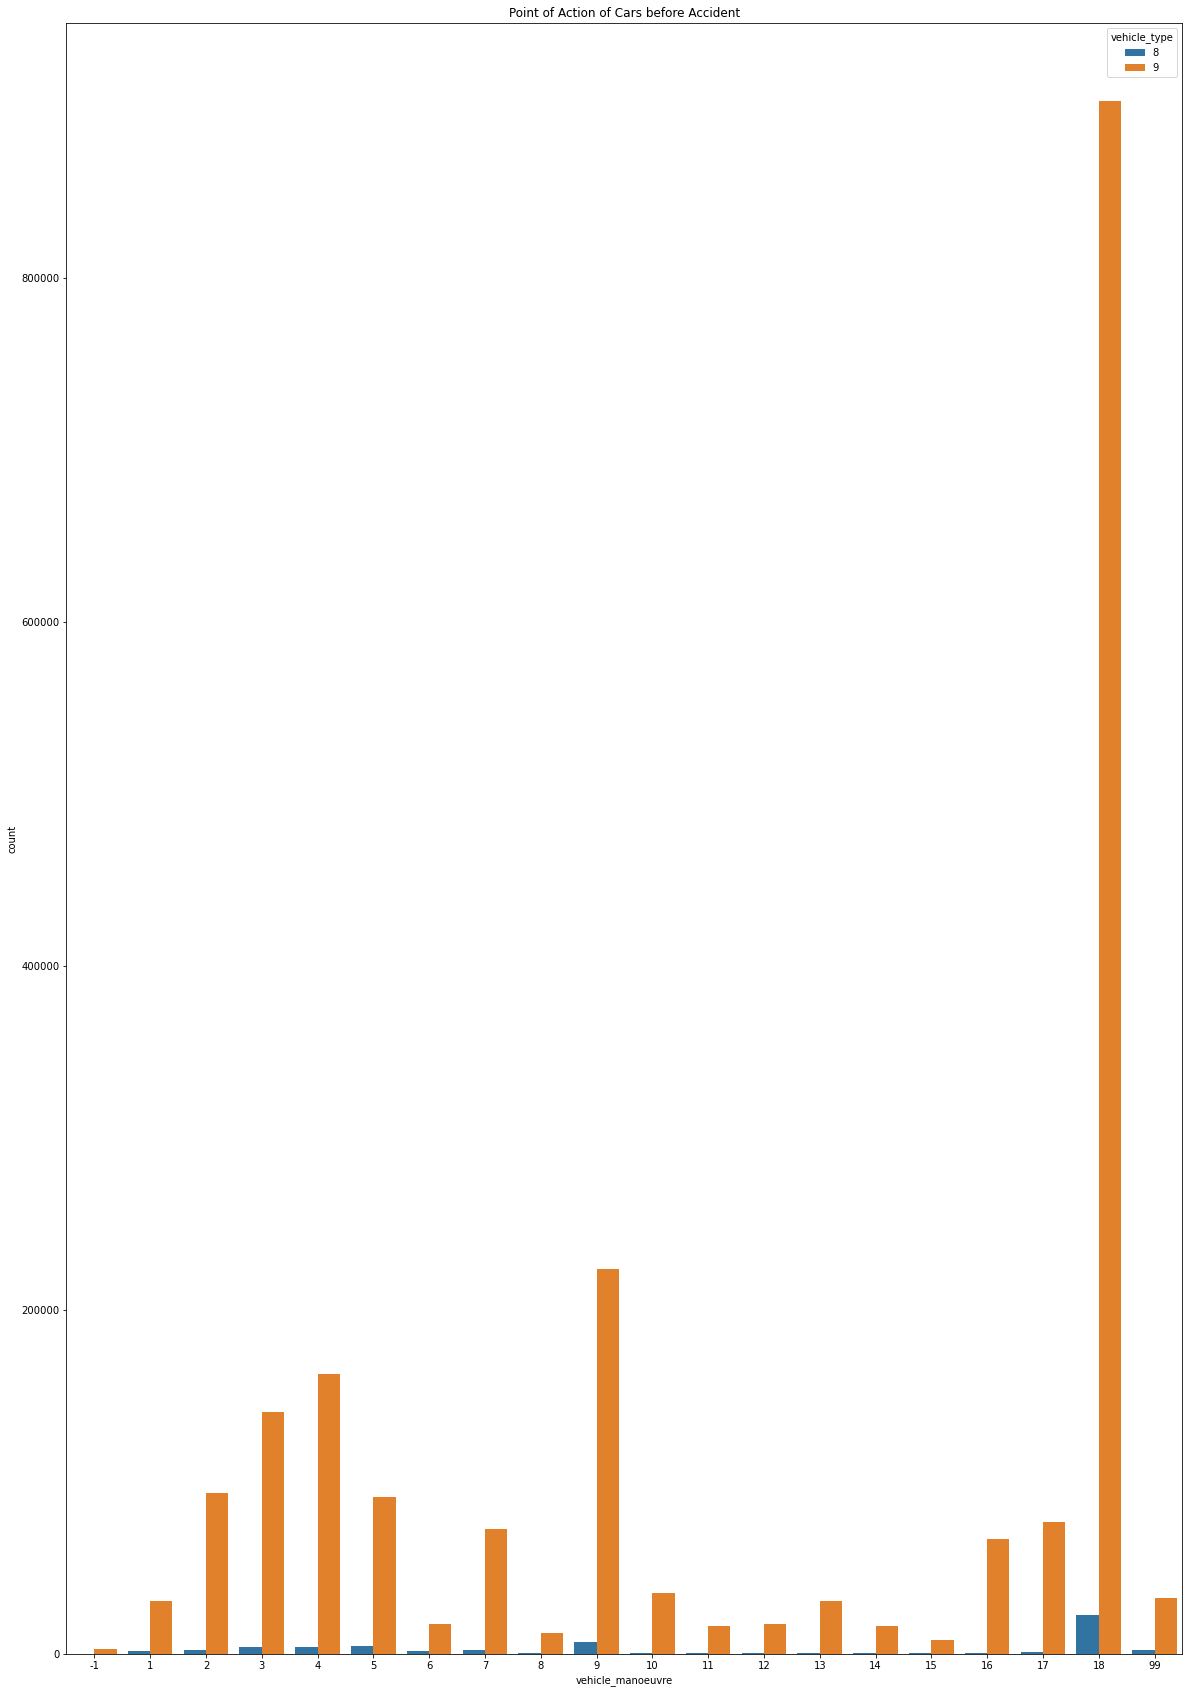

In [27]:
#plot using a countplot to see which cars performed each action at the point of accident
plt.figure(figsize = (20, 30))
sns.countplot(data = cars, x = 'vehicle_manoeuvre', hue = 'vehicle_type')
plt.title('Point of Action of Cars before Accident');

The top 5 vehicle manoeuvres that caused accidents are 

18 - Going ahead other

9 - Turning right
 
4 - Slowing or stopping

3 - Waiting to go - held up

2 - Parked



Cars(9) accidents have the highest record of going ahead before the accident occured, the second majority is turning right, next is slowing or stopping, waiting to go-held up and Parked. Performing these actions have shown to be linked to accidents.

Taxi/Private hire cars(8) have the highest record of going ahead before the accident occured, the second majority of accidents were slowing down just like cars.

#### What direction were the cars coming from and going to before the accident?

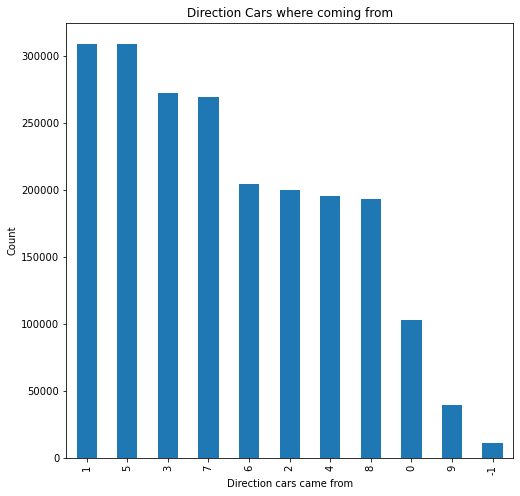

In [28]:
#plot a bar chart to view the most common direction cars came from 
cars.vehicle_direction_from.value_counts().plot(kind='bar', figsize=(8,8))
plt.xlabel('Direction cars came from')
plt.ylabel('Count')
plt.title('Direction Cars where coming from');

Interpretation of values

1 - North

5 - South East

3 - East

7 - West

6 - South West

2 - North East

4 - South East

8 - North West

0 - Parked

9 - Unknown

-1 - 


Majority of the cars were coming from the North and South East. The second majority were coming from the East and West

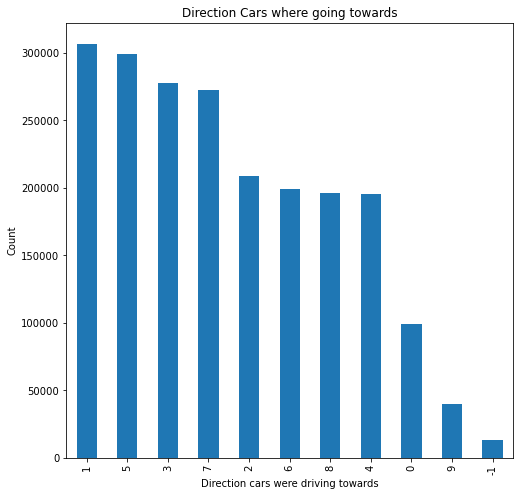

In [29]:
#plot a bar chart to view the most common direction cars were going towards 
cars.vehicle_direction_to.value_counts().plot(kind='bar', figsize=(8,8))
plt.xlabel('Direction cars were driving towards')
plt.ylabel('Count')
plt.title('Direction Cars where going towards');

Interpretation of Values - Same with Vehicle Direction From

Majority of the cars were driving towards the same direction majority of the cars that had accicdents were driving from

Therefore, the North, South East, East and West are accident prone zones

#### If the accidents happened at junctions, where did they happen?

In [30]:
#check for the the unique values of junction locations
cars.junction_location.unique()

array([ 8,  0,  6,  2,  1,  5,  3,  7,  4, -1,  9], dtype=int64)

In [31]:
# derive the common junction locations where accidents happened
cars.junction_location.value_counts()

 0    844213
 1    471276
 8    385397
 2    117367
 6    103512
 4     62397
 5     58474
 3     29390
 9     25963
 7      8388
-1      1117
Name: junction_location, dtype: int64

Majority of the accidents did not happen at the junction or they happened at the begining of a junction

#### What was the first point of impact on the cars?

In [32]:
#view the unique values of first point of impact
cars.first_point_of_impact.unique()

array([ 1,  4,  2,  3,  0, -1,  9], dtype=int64)

Interpretation of the values

0 - Did not impact

1 - Front

2 - Back

3 - Offside

4 - Nearside

9 - Unknown(self reported)

-1 - Data Missing or out of range

In [33]:
cars.first_point_of_impact.value_counts()

 1    1036178
 2     410527
 3     290233
 4     256946
 0      93761
 9      16202
-1       3647
Name: first_point_of_impact, dtype: int64

Majority of the cars were hit in the front, this had a total count of 1036178 hits. The second majority of cars were hit at the back, a total of 410527 hits happened. 

Next, which cars got hit the most and where was the most frequent point of impact for both car categories?

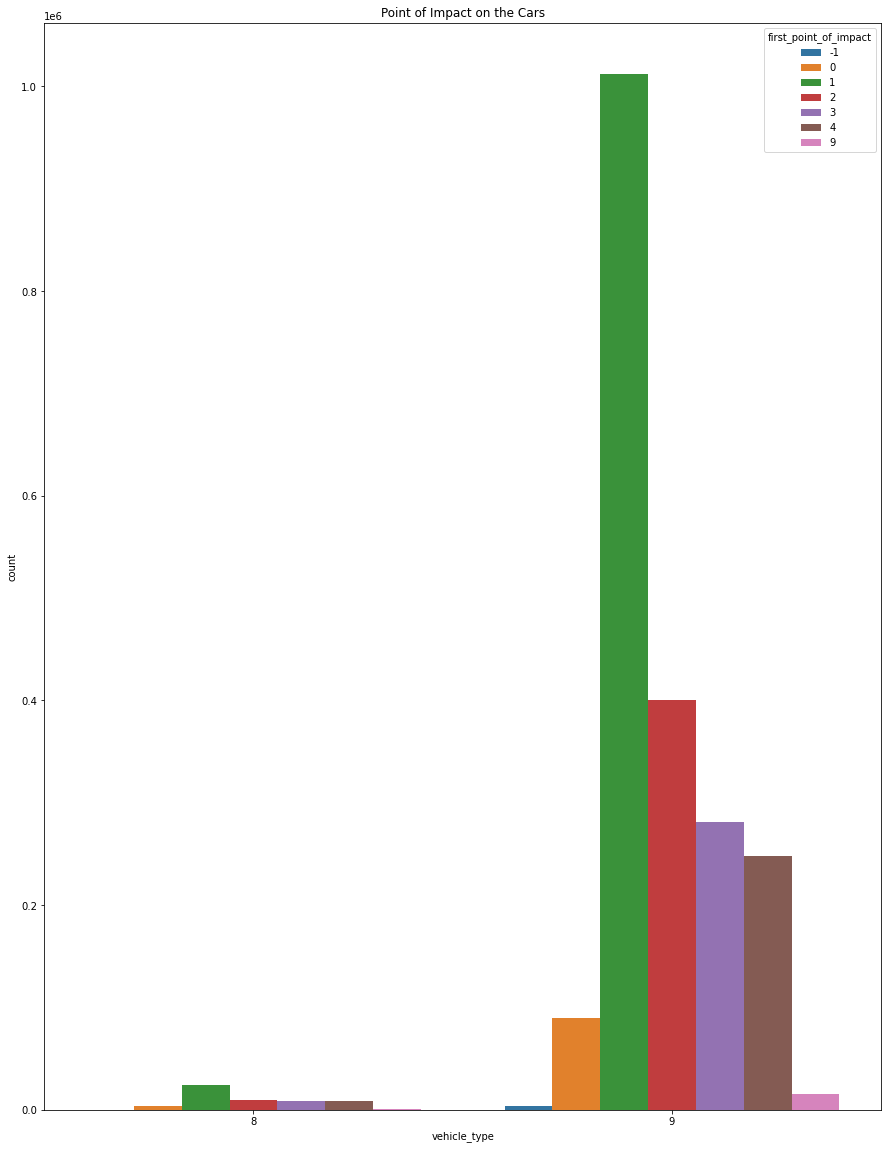

In [34]:
#plot using a countplot to see which cars performed each action at the point of accident
plt.figure(figsize = (15, 20))
sns.countplot(data = cars, x = 'vehicle_type', hue = 'first_point_of_impact')
plt.title('Point of Impact on the Cars');

The Same conclusion given above implies to Cars(9), but for Taxi/private hire cars their first impact was mostly the front of the car, then the back, Offside and Nearside hit seem to have close or equal counts

#### What are the wheel positions in the cars?

In [35]:
#view the unique values for vehicle left hand drive
cars.vehicle_left_hand_drive.unique()

array([ 1,  2, -1,  9], dtype=int64)

In [36]:
cars.vehicle_left_hand_drive.value_counts()

 1    2055635
 9      41091
 2       9273
-1       1495
Name: vehicle_left_hand_drive, dtype: int64

Interpretation of values

1 -  No

2 - Yes

9 - Unknown

-1 - Data missing or out of range

Majority of the cars do not have the wheels by the left

#### Could the journey purpose have any impact on car accidents

In [37]:
#view the unique values
cars.journey_purpose_of_driver.unique()

array([ 1, 15,  2,  3,  4, -1,  6,  5], dtype=int64)

In [38]:
cars.journey_purpose_of_driver.value_counts()

 6     1349507
 1      218171
 2      205252
 15     164684
 5      139181
 3       27684
 4        2758
-1         257
Name: journey_purpose_of_driver, dtype: int64

6 - Not known


Majority of the car accidents that occured did not have a journey purpose

#### Who got into accidents the most, Males or Females?

In [39]:
#view the unique values
cars.sex_of_driver.unique()

array([ 1,  2,  3, -1], dtype=int64)

In [40]:
cars.sex_of_driver.value_counts()

 1    1201452
 2     725985
 3     179997
-1         60
Name: sex_of_driver, dtype: int64

Interpretation of Values

1 - Males

2 - Females

3 - Not known

-1 - Data missing or out of range


Majority of the drivers were males

Next, what cars were the males driving the most?

In [41]:
cars.groupby('vehicle_type')['sex_of_driver'].value_counts()

vehicle_type  sex_of_driver
8              1                 50455
               3                  4709
               2                  2062
              -1                     3
9              1               1150997
               2                723923
               3                175288
              -1                    57
Name: sex_of_driver, dtype: int64

Majority of the males were driving their Cars(9)

#### What age band were mostly involved in accidents?

In [42]:
cars.age_band_of_driver.unique()

array([ 8,  5,  7,  6,  4, 10, -1,  9, 11,  3,  1,  2], dtype=int64)

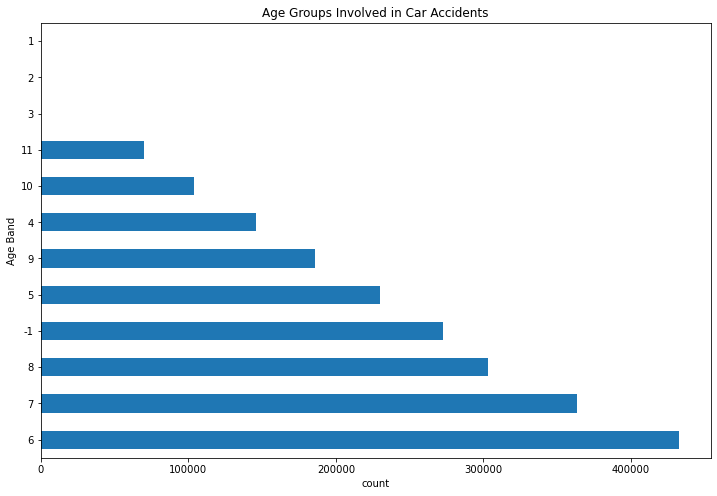

In [43]:
cars.age_band_of_driver.value_counts().plot(kind='barh', figsize=(12, 8))
plt.xlabel('count')
plt.ylabel('Age Band')
plt.title('Age Groups Involved in Car Accidents');

The top 5 age groups are 6, 7, 8, -1 and 5. The least age group is 11

6 - 26-35

7 - 36-45

8 - 46-55

-1 - Data Missing or out of range

5 - 21-25

11 - Over 75


Age groups of 26-35  have been recorded to have encountered the most accidents, what could be the possible cause of this? It could be said that this age group is the most populous in the work force and therefore get to move around more than other age groups.

Could more males than females still fall into this age bracket?


Age groups over 75 experience the least amount of accidents, these are the elderly in the community, they most likely do not get to drive so much or move around so often.

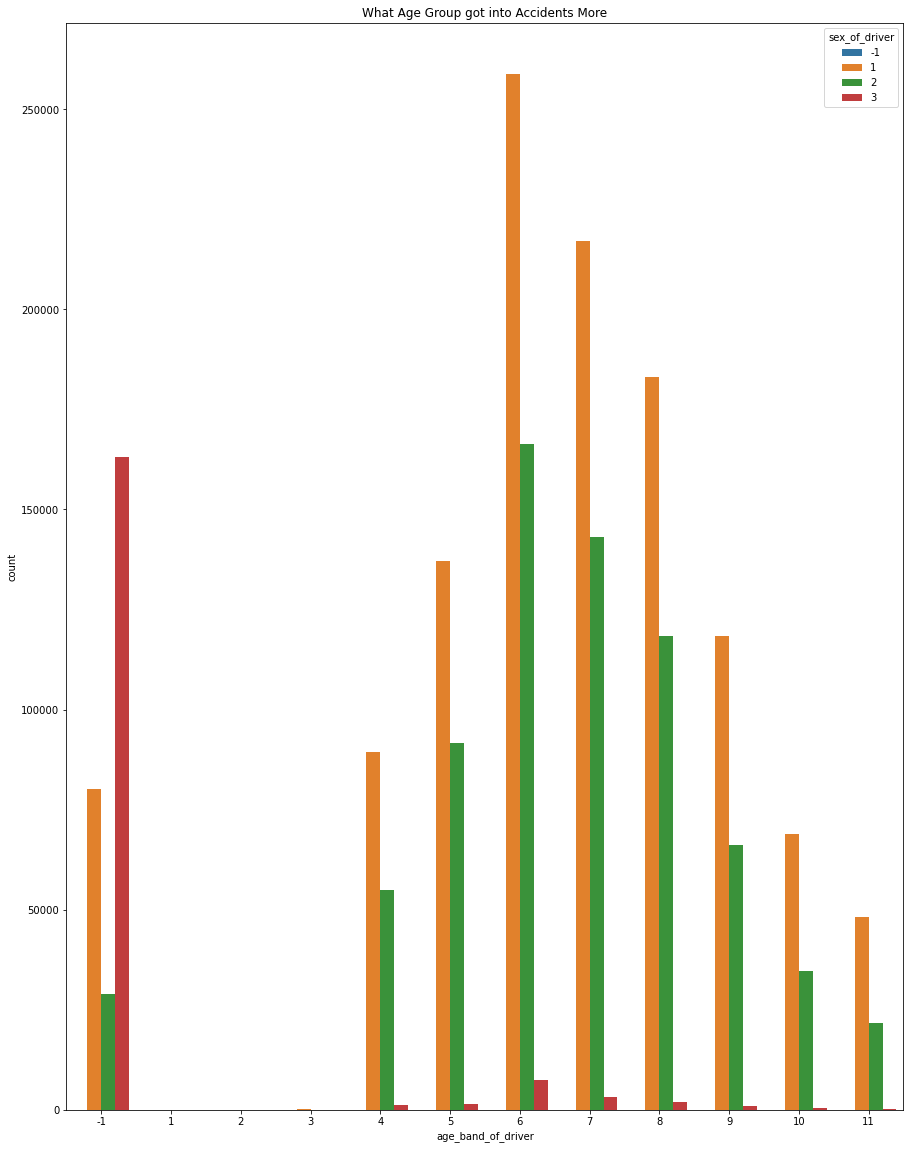

In [44]:
#plot using a countplot to see which gender got into accidents more especially age group 26-35
plt.figure(figsize = (15, 20))
sns.countplot(data = cars, x = 'age_band_of_driver', hue = 'sex_of_driver')
plt.title('What Age Group got into Accidents More');

Again, males got into accidents more

#### What are the major locations of the Drivers?

In [45]:
cars.driver_home_area_type.unique()

array([ 1,  3, -1,  2], dtype=int64)

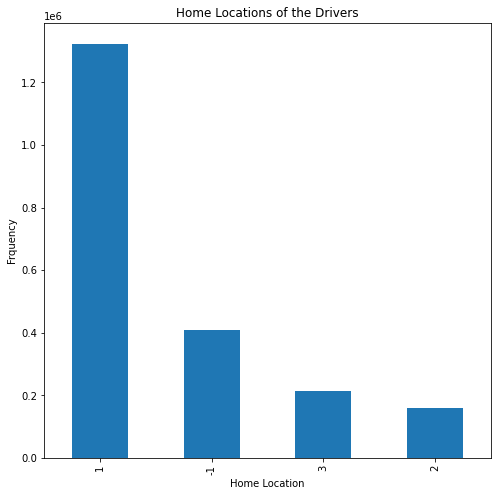

In [46]:
cars.driver_home_area_type.value_counts().plot(kind='bar', figsize=(8,8))
plt.xlabel('Home Location')
plt.ylabel('Frquency')
plt.title('Home Locations of the Drivers');

1 - Urban

2 - Small Town

3 - Rural

4 - Data missing or out of range


Majority of the drivers lived in the urban Areas

#### What lane was the car at the point of impact?

In [47]:
cars.vehicle_location_restricted_lane.unique()

array([ 0,  2,  4,  3,  8,  7,  9,  5,  6,  1, -1, 99], dtype=int64)

In [48]:
cars.vehicle_location_restricted_lane.value_counts()

 0     2036522
 99      33617
 9       17896
 6        5606
 2        3719
-1        2715
 8        2608
 4        1673
 7        1103
 5         994
 1         689
 3         352
Name: vehicle_location_restricted_lane, dtype: int64

0 - On main c'way - not in restricted lane


Most accidents did not occur in restricted lanes

#### What happened after car impact?

In [49]:
cars.skidding_and_overturning.unique()

array([ 0,  1,  2,  5,  4,  3, -1,  9], dtype=int64)

In [50]:
cars.skidding_and_overturning.value_counts()

 0    1855151
 1     146107
 9      35661
 2      35279
 5      32258
-1       2516
 3        275
 4        247
Name: skidding_and_overturning, dtype: int64

0 - None

Majority of the cars did not skid or overturn

#### Can the type of fuel used by the vehicle be linked to the accident cause?

In [51]:
cars.propulsion_code.unique()

array([ 2,  1, -1,  8,  6,  7,  3,  9,  5, 11, 10, 12], dtype=int64)

In [52]:
cars.propulsion_code.value_counts()

 1     1078116
 2      639602
-1      355319
 8       29109
 3        2210
 7        1842
 6         640
 12        595
 5          42
 10         11
 9           5
 11          3
Name: propulsion_code, dtype: int64

Interpretation of First 5 values

1 - Petrol

2 - Heavy oil

-1 - Undefined

8 - Hybrid Electric

3 - Electric

7 - Gas/Bi-fuel

6 - Petrol/Gas (LPG)

12 - Electric Diesel

5 - Gas

10 - New fuel technology

9 - Gas Diesel

11 - Fuel Cells


Cars which use Petrol have been in accidents more than others, it had a count of 1078116 accidents. The second majority of cars are the cars that used Heavy Oils. These are the 2 group of cars mostly involved in accidents.

Cars which use Fuel cells are the cars that have accidents the least.

In [53]:
cars.columns

Index(['Unnamed: 0', 'accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'vehicle_type', 'towing_and_articulation',
       'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type', 'lsoa_of_driver'],
      dtype='object')

In [54]:
#vehicle leaving carriageway
cars.vehicle_leaving_carriageway.value_counts()

 0    1823511
 1     127089
 7      65254
 9      34009
 2      17493
 4       9737
 3       9460
 8       9017
 5       7174
-1       2773
 6       1977
Name: vehicle_leaving_carriageway, dtype: int64

Majority of the car accidents did not leave carriageway

In [55]:
#hit object in carriageway and off carriageway

cars.hit_object_in_carriageway.value_counts()

 0     1977741
 99      35048
 10      33027
 4       32928
 7       11303
 11       5730
-1        2678
 9        2289
 12       2112
 6        1447
 8        1147
 1        1029
 2         960
 5          55
Name: hit_object_in_carriageway, dtype: int64

In [56]:
cars.hit_object_off_carriageway.value_counts()

 0     1895618
 10      44244
 99      33635
 4       30196
 11      20715
 1       16846
 9       16084
 2       14764
 6       14298
 7       13630
 3        5842
 5        1131
-1         284
 8         207
Name: hit_object_off_carriageway, dtype: int64

Majority of the car accidents did not hit objects in and off the carriageway

In [57]:
#drop columns that won't be needed
cars.drop(['Unnamed: 0', 'accident_year', 'accident_reference', 'vehicle_reference', 'towing_and_articulation', 
           'vehicle_location_restricted_lane', 'junction_location', 'skidding_and_overturning', 'hit_object_in_carriageway', 
           'vehicle_leaving_carriageway', 'hit_object_off_carriageway', 'vehicle_left_hand_drive', 'journey_purpose_of_driver', 
           'age_of_driver', 'lsoa_of_driver'], axis=1, inplace=True)

C:\Users\Haywh\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [58]:
cars.columns

Index(['accident_index', 'vehicle_type', 'vehicle_manoeuvre',
       'vehicle_direction_from', 'vehicle_direction_to',
       'first_point_of_impact', 'sex_of_driver', 'age_band_of_driver',
       'engine_capacity_cc', 'propulsion_code', 'age_of_vehicle',
       'generic_make_model', 'driver_imd_decile', 'driver_home_area_type'],
      dtype='object')

In [59]:
#export the cleaned data for cars
cars.to_csv('updated_vehi_data.csv', index=False)